In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import seaborn as sns

In [2]:
# Cargamos nuestro Data Set
mall = pd.read_csv('Mall_Customers.csv')

In [3]:
mall.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
genero_mapeo={'Male':1,'Female':2}

In [6]:
mall['Gender']=mall['Gender'].map(genero_mapeo)

In [7]:
print(mall.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       2   20                  16                       6
3           4       2   23                  16                      77
4           5       2   31                  17                      40


In [8]:
# la siguiente linea lo que hace es obtener un resumen estadístico de nuestro Dataset.
mall.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,1.000000,18.000000,15.000000,1.000000
25%,50.750000,1.000000,28.750000,41.500000,34.750000
50%,100.500000,2.000000,36.000000,61.500000,50.000000
75%,150.250000,2.000000,49.000000,78.000000,73.000000
max,200.000000,2.000000,70.000000,137.000000,99.000000


In [9]:
# Identificar valores faltantes en nuestro dataset
print(mall.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


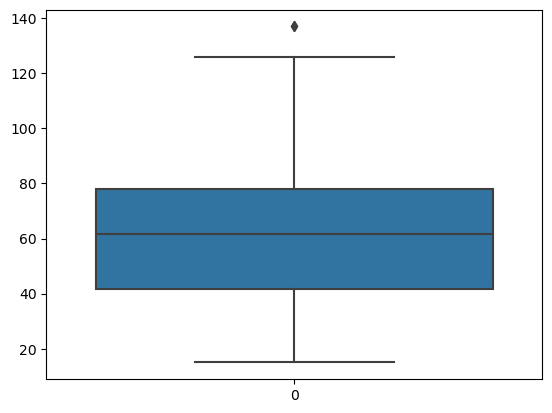

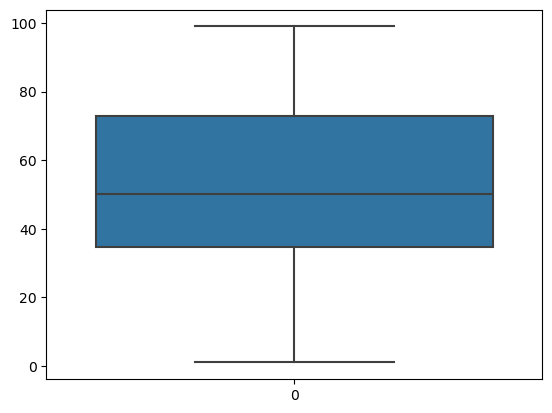

In [10]:
# Vamos a identificar valores atipicos en nuestro Data Set
sns.boxplot(data=mall['Annual Income (k$)'])
plt.show()

sns.boxplot(data=mall['Spending Score (1-100)'])
plt.show()

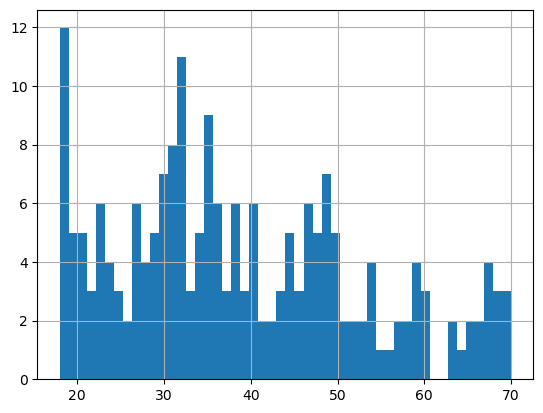

In [11]:
# Vamos a realizar un analisis de Distribución para la variable Age. 
mall['Age'].hist(bins=50)
plt.show()

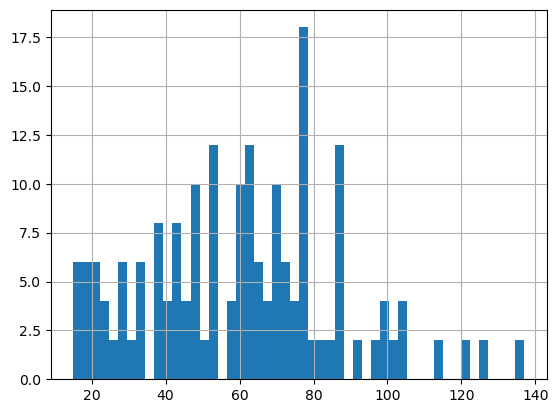

In [12]:
# Vamos a realizar un analisis de Distribución para la variable Annual Income
mall['Annual Income (k$)'].hist(bins=50)
plt.show()

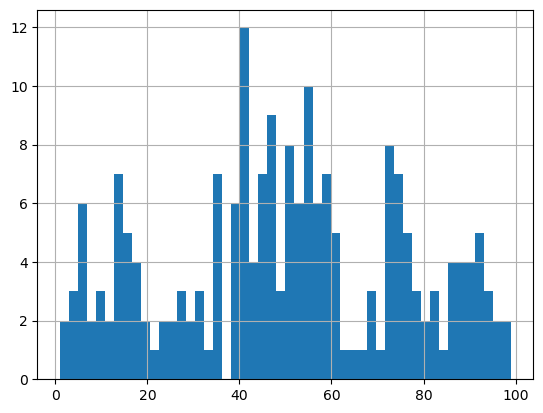

In [13]:
# Vamos a realizar un analisis de Distribución para la variable Spending Score
mall['Spending Score (1-100)'].hist(bins=50)
plt.show()

C:\Users\lukha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lukha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lukha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


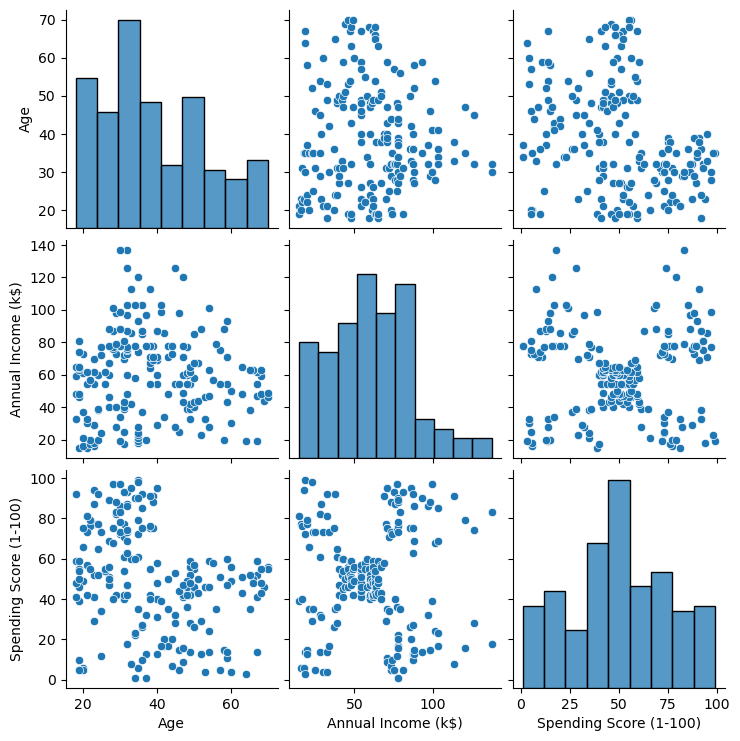

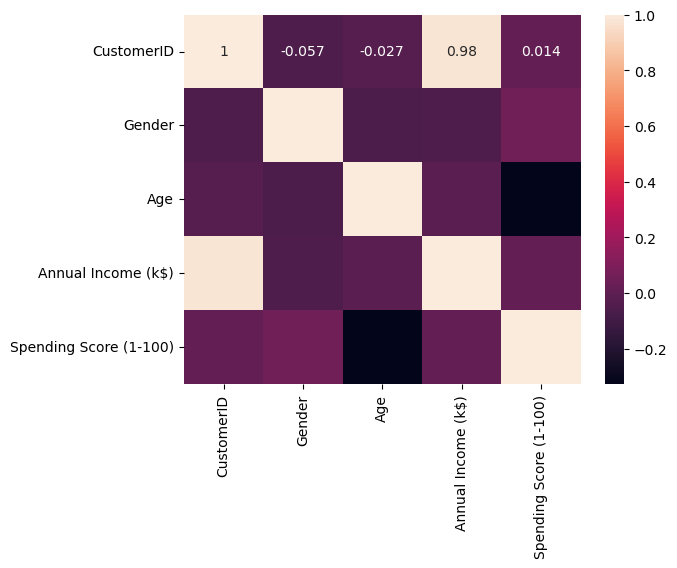

In [14]:
# Realizaremos un analisis de relaciones entre variables
sns.pairplot(mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()
    
corr_matrix = mall.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

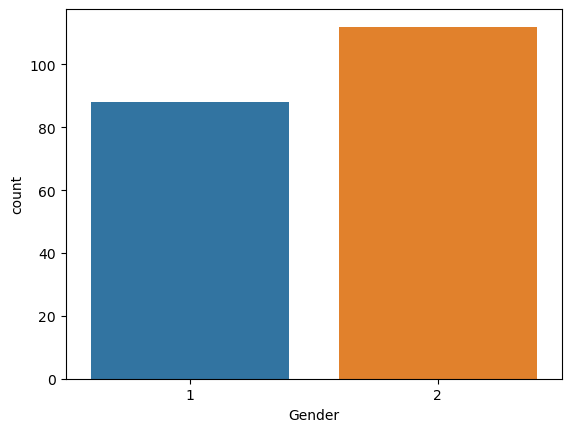

In [16]:
# realizaremos un analisis de Genero donde Male es 1 y Female 2 
sns.countplot(data=mall, x='Gender')
plt.show()

C:\Users\lukha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lukha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


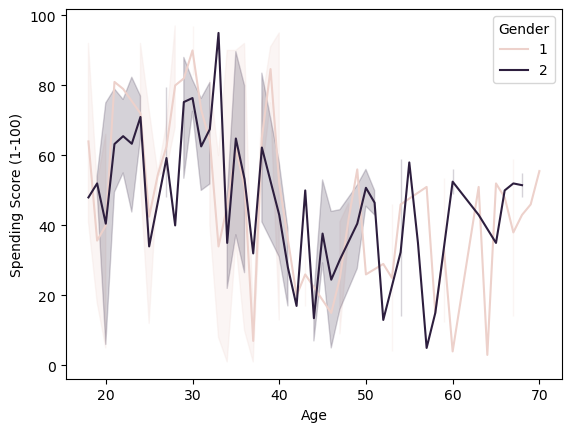

In [17]:
# Buscaremos tendencias y patrones 
sns.lineplot(data=mall, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.show()

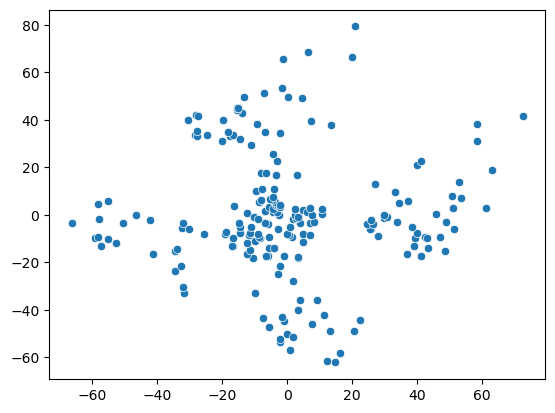

In [20]:
# Buscaremos valores atipicos multivariados 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(mall[['Age','Annual Income (k$)','Spending Score (1-100)']])
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1])
plt.show()